# Endometrium analysis - clusters visualization

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures_primaryEpithelial_clean/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.4 anndata==0.6.22rc1 umap==0.3.10 numpy==1.17.5 scipy==1.3.0 pandas==0.25.3 scikit-learn==0.22.1 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


'/home/jovyan/my-conda-envs/myenvSC/bin/python'

## Load data

In [2]:
adata = sc.read('data/epithelial-clean_freeze.h5ad')
adata.X.shape

(5284, 5869)

In [15]:
adata.obs.head()

,batch,bh_pval,bonf_pval,clinical,day,individual,is_doublet,is_doublet_propagate,leiden,location,...,scrublet_score,treatment,type,zscore,leiden_K,cycle_phase,S_score,G2M_score,leiden_v0,clusters
index,,,,,,,,,,,,,,,,,,,,,
4861STDY7309368_AACTTTCCAGACGTAG,0,0.809091,1.0,U,U,A10,False,False,1,ENMY,...,0.043307,C,CBTM,-0.150670,5,P,-0.532187,-0.011435,5,proliferative_I
4861STDY7309368_AACTTTCCAGTGACAG,0,0.809091,1.0,U,U,A10,False,False,2,ENMY,...,0.121951,C,CBTM,0.726267,5,P,-0.199521,-0.244215,0,proliferative_III
4861STDY7309368_AATCCAGTCAGAAATG,0,0.809091,1.0,U,U,A10,False,False,2,ENMY,...,0.063830,C,CBTM,-0.076639,5,P,-0.021468,-0.253359,0,proliferative_III
4861STDY7309368_AATCGGTTCATGTAGC,0,0.809091,1.0,U,U,A10,False,False,1,ENMY,...,0.040000,C,CBTM,-0.150670,5,P,0.101581,0.009611,5,proliferative_I
4861STDY7309368_ACACCAACAGGCTGAA,0,0.809091,1.0,U,U,A10,False,False,2,ENMY,...,0.038425,C,CBTM,-0.076639,5,P,-0.362576,-0.181230,5,proliferative_III


In [17]:
print(adata.obs[['individual', 'sample', 'location', 'treatment', 'type', 'clinical', 'day']].drop_duplicates())

                                   individual           sample location  \
index                                                                     
4861STDY7309368_AACTTTCCAGACGTAG          A10  4861STDY7309368     ENMY   
4861STDY7309369_AAAGCAAGTAATTGGA          A10  4861STDY7309369     ENMY   
4861STDY7309370_AACCATGGTTTGTGTG          A10  4861STDY7309370     ENMY   
4861STDY7387181_AAACCTGTCAATAAGG          A13  4861STDY7387181     ENMY   
4861STDY7387182_AAACGGGTCTTACCGC          A13  4861STDY7387182     ENMY   
4861STDY7387183_CAACCTCTCATTGCCC          A13  4861STDY7387183       MY   
4861STDY7462245_AAACGGGGTTCCTCCA          A16  4861STDY7462245     ENMY   
4861STDY7462246_AAAGCAACAGACAGGT          A16  4861STDY7462246     ENMY   
4861STDY7462247_AAACCTGAGGGAACGG          A16  4861STDY7462247     ENMY   
4861STDY7462248_AGCTCTCCAGACGCTC          A16  4861STDY7462248       MY   
4861STDY7771114_AAACCTGTCGGCGCTA          A30  4861STDY7771114     ENMY   
4861STDY7771115_ACGAGGATC

## Rename clusters

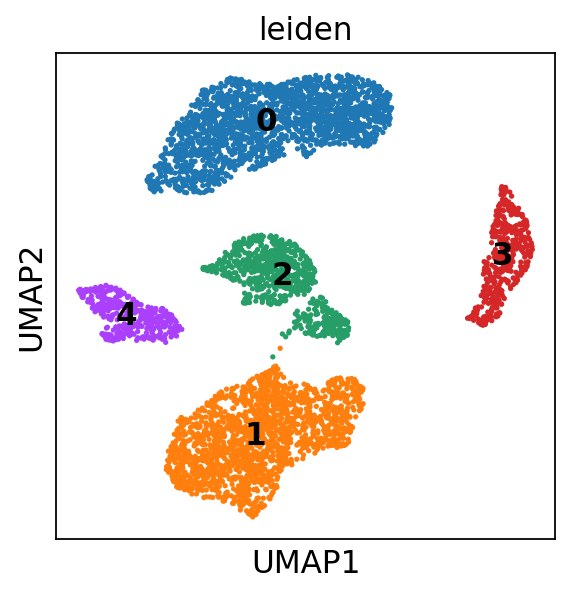

Index(['0', '1', '2', '3', '4'], dtype='object')

In [4]:
sc.pl.umap(adata, color=['leiden'], legend_loc="on data")
adata.obs['leiden'].cat.categories

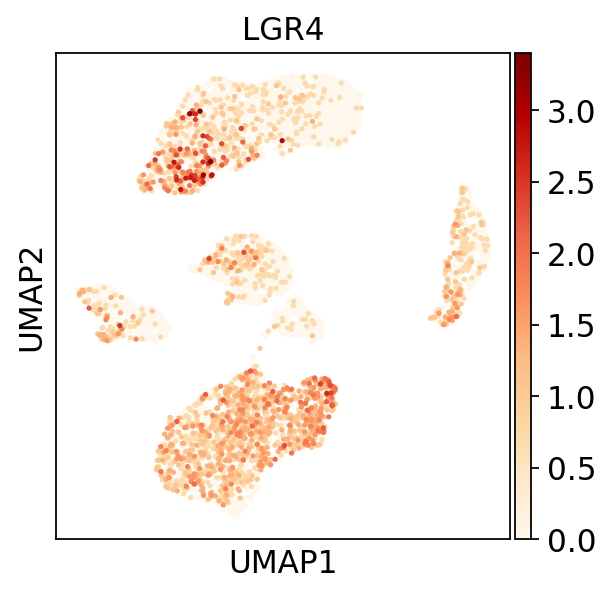

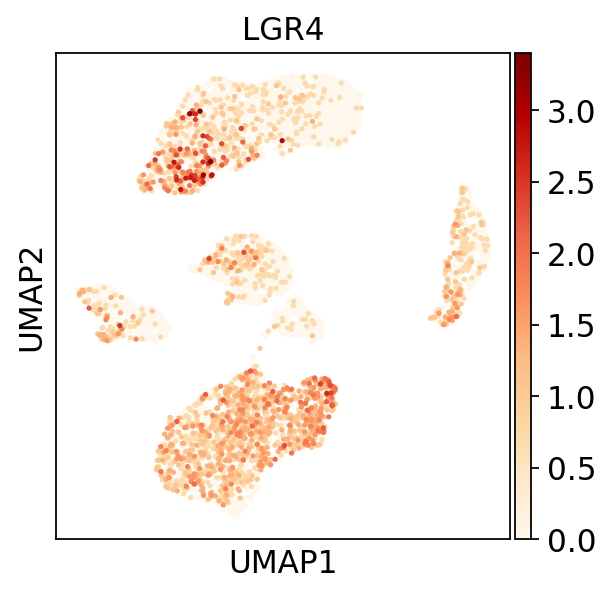

In [5]:
sc.pl.umap(adata, color=["LGR4"], color_map='OrRd', use_raw=True) # FEMALE
sc.pl.umap(adata, color=["LGR4"], color_map='OrRd') # FEMALE

In [6]:
adata.obs['clusters'] = adata.obs['leiden']
adata.obs['clusters'].cat.categories = ['glandular', 'proliferative_I', 'proliferative_III',  'ciliated', 'proliferative_II']
# order is: 1 > 4 > 0 > 2 > 3
adata.obs['clusters'].cat.reorder_categories(['proliferative_I', 
                                              'proliferative_II', 'proliferative_III', 'glandular', 
                                              'ciliated'], inplace=True)
pd.DataFrame(adata.obs).to_csv(str(sc.settings.figdir)+'/../data/cell_annotations/all_epithelial.csv')

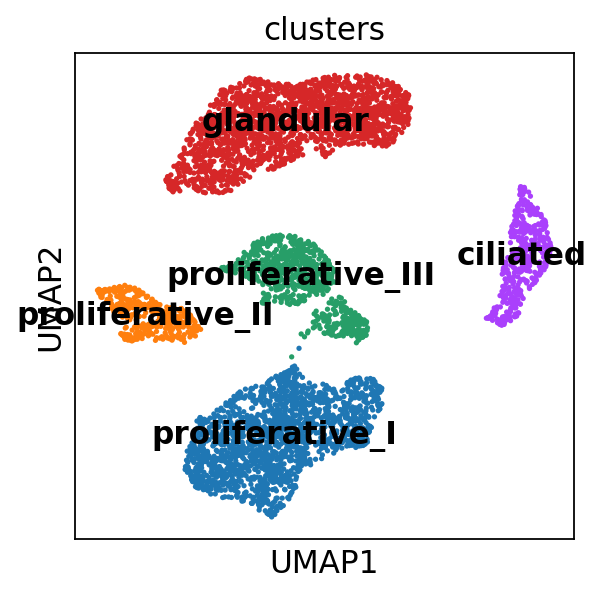

In [7]:
sc.pl.umap(adata, color=['clusters'], legend_loc='on data')

## Color clusters

Choose the colors of the clusters a bit more consistently.

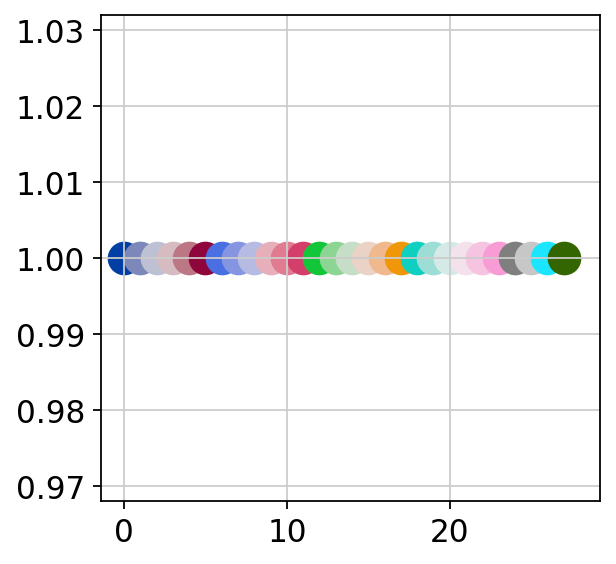

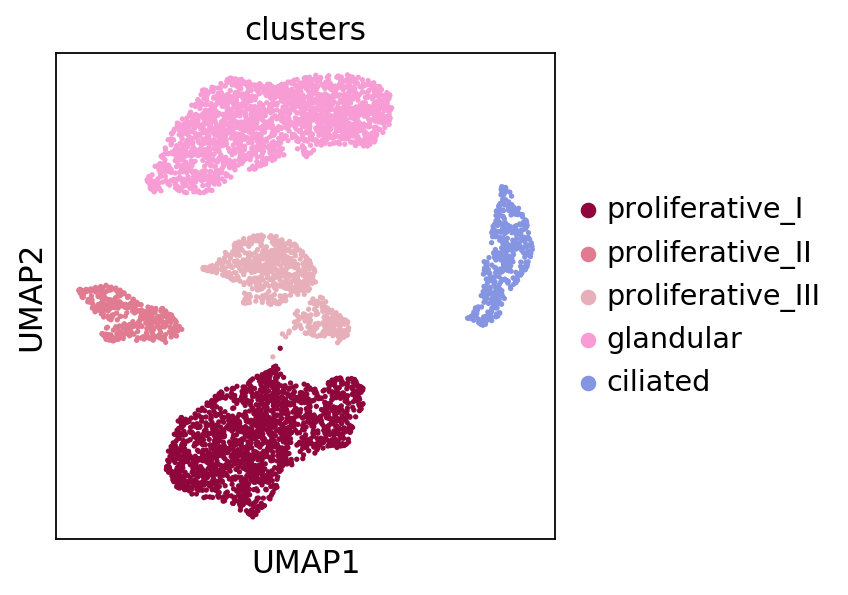

In [8]:
import matplotlib.pyplot as pl

for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_26[i], s=200)
pl.show()
orig_colors = np.array(sc.pl.palettes.zeileis_26)
new_colors = orig_colors.copy()
new_colors[[0, 1, 2, 3, 4]] = orig_colors[[5, 10,  9, 23,  7]]  # mid / red
adata.uns['clusters_colors'] = new_colors
sc.pl.umap(adata, color=['clusters'], save='_figure2b_primary_epithelial.pdf')

## Change metadata colors

In [9]:
# 'cycle_phase', 'type', 'treatment', 'phase']
# A3A8AD: per a Proliferatiu; CBTM; Collagenase; G1
# F9EE64: per a secretory; UB; Trypsin, G2M
# 48C7F4: per a S
print(adata.obs['cycle_phase'].cat.categories)
new_colors[[0, 1]] = [['#A3A8AD', '#F9EE64']]
adata.uns['cycle_phase_colors'] = new_colors

print(adata.obs['type'].cat.categories)
new_colors[[0, 1]] = [['#A3A8AD', '#F9EE64']]
adata.uns['type_colors'] = new_colors

print(adata.obs['treatment'].cat.categories)
new_colors[[0, 1]] = [['#A3A8AD', '#F9EE64']]
adata.uns['treatment_colors'] = new_colors

print(adata.obs['phase'].cat.categories)
new_colors[[0, 1, 2]] = [['#A3A8AD', '#F9EE64', '#48C7F4']]
adata.uns['phase_colors'] = new_colors

Index(['P', 'S'], dtype='object')
Index(['CBTM', 'UB'], dtype='object')
Index(['C', 'T'], dtype='object')
Index(['G1', 'G2M', 'S'], dtype='object')


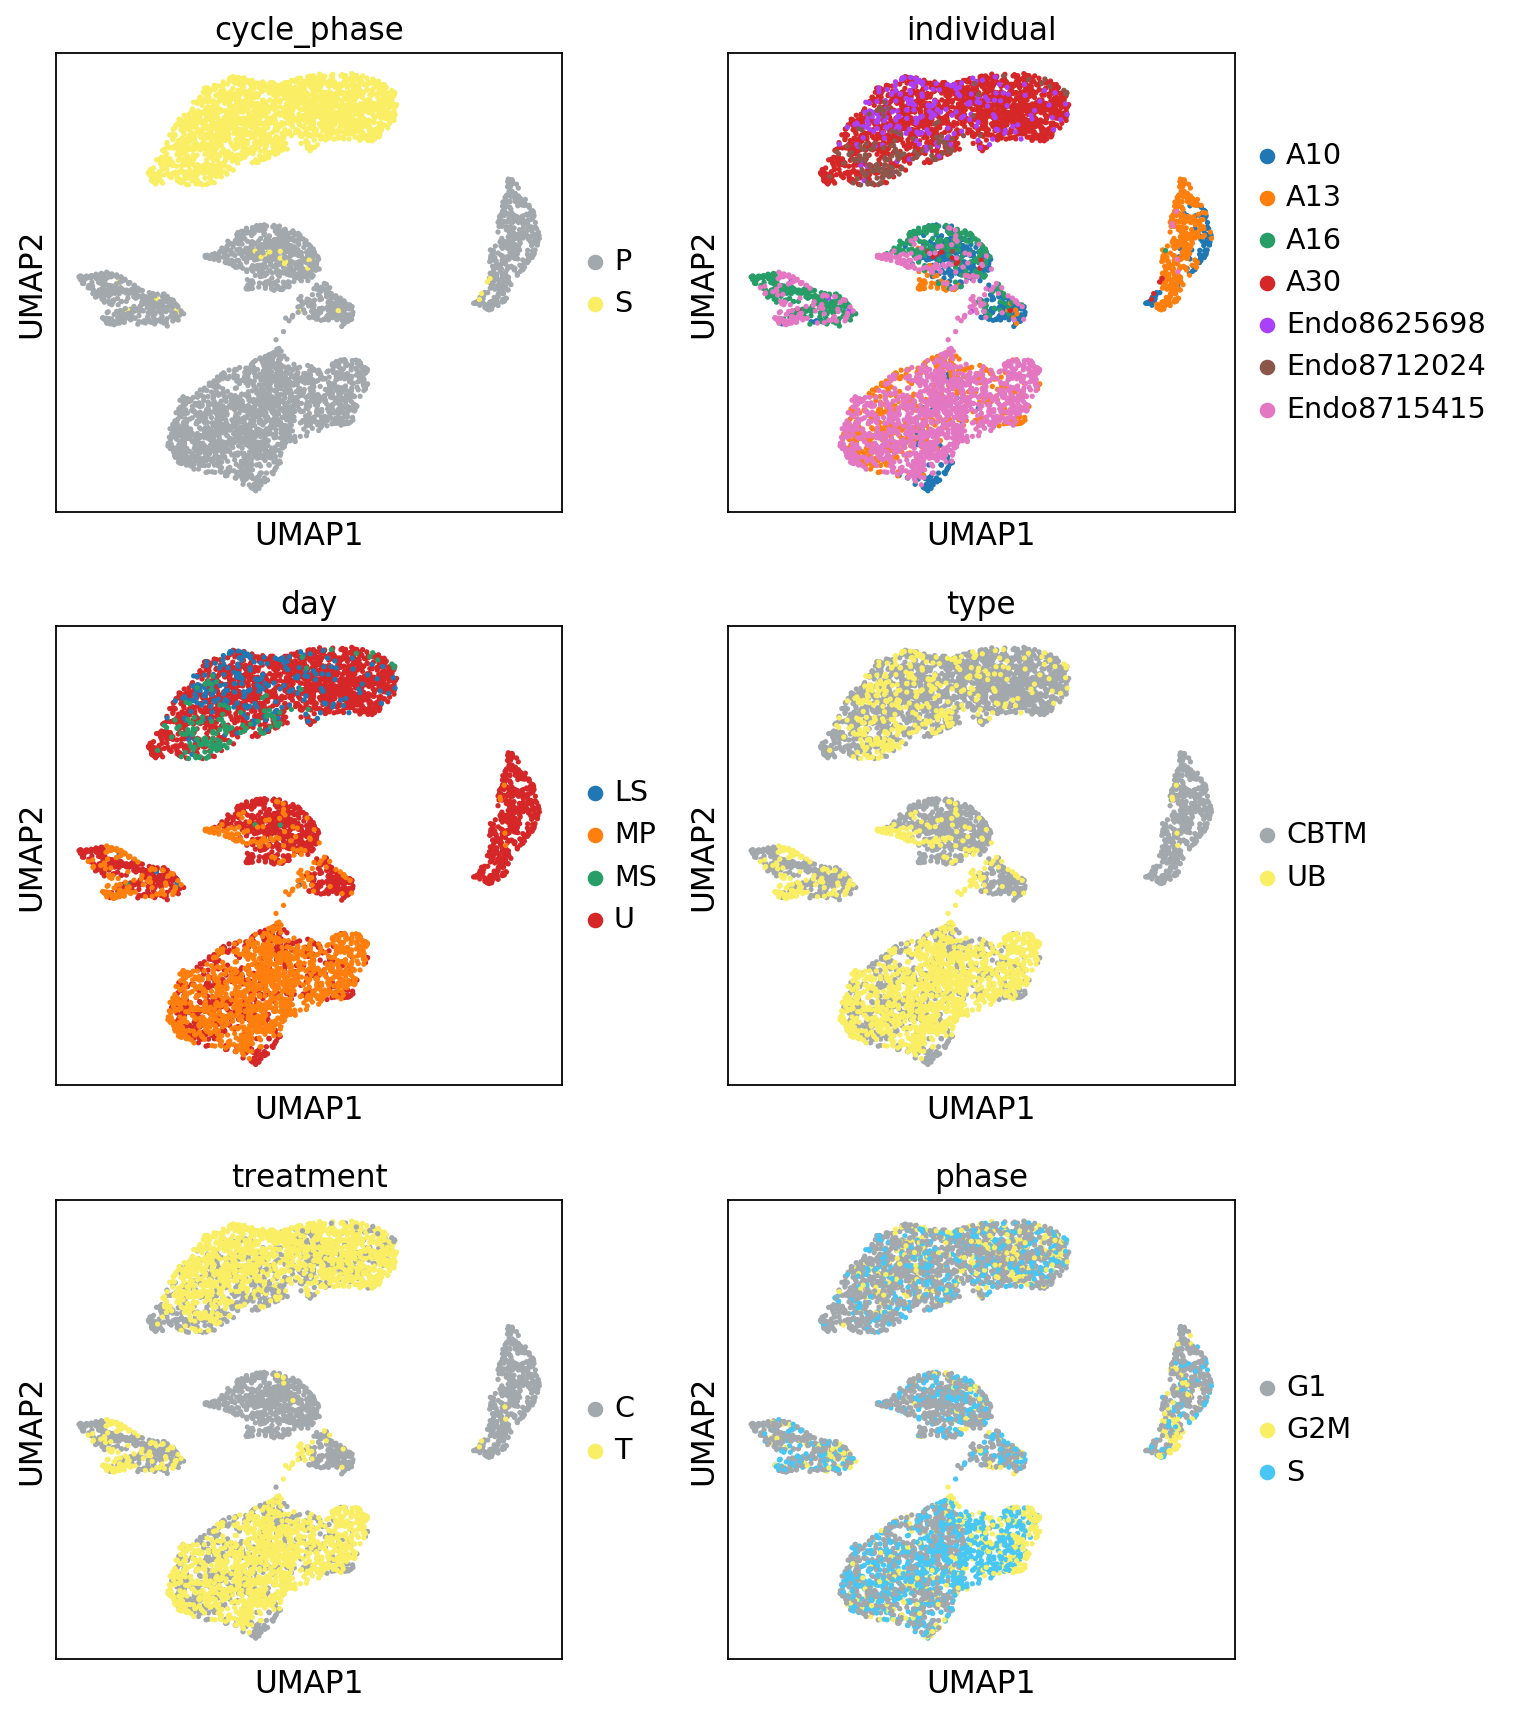

In [10]:
sc.pl.umap(adata, color=['cycle_phase', 'individual', 'day', 'type', 'treatment', 'phase'], save='_primary_epithelial_metadata.pdf', ncols = 2)

## Save Stats

In [11]:
adata.obs.to_csv(str(sc.settings.figdir)+'/barcode_metadata.csv')
stats = adata.obs.clusters.values.describe()
stats.to_csv(str(sc.settings.figdir)+'/cluster_stats_primary_epithelial.csv')
adata.write('data/endometrium-N8-epithelial-clean_Luzprocessing_freeze_annot.h5ad')

## Generate matrix and save cellXgene and Seurat

In [12]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count, max_value=10)
adata_count.obsm['X_umap'] = adata.obsm['X_umap']
adata_count.uns['clusters_colors'] = adata.uns['clusters_colors']
adata_count.write('cellXgene/endometrium_epithelial.h5ad')

os.system('rm data/endometrium-N8-epithelial-clean_Luzprocessing_freeze_annot_forSeurat.h5ad')
adataR = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
adataR.obs['clusters'] = adataR.obs['clusters'].tolist()
adataR.write('data/endometrium-N8-epithelial-clean_Luzprocessing_freeze_annot_forSeurat.h5ad')

... storing 'clusters' as categorical


# Dotplots
## with markers

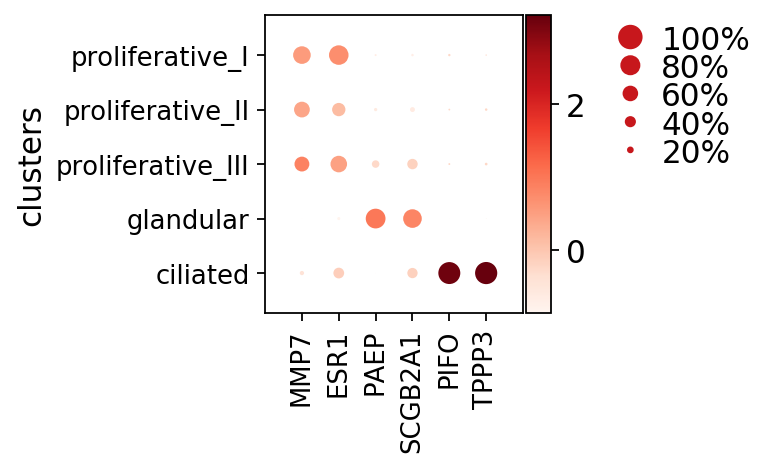

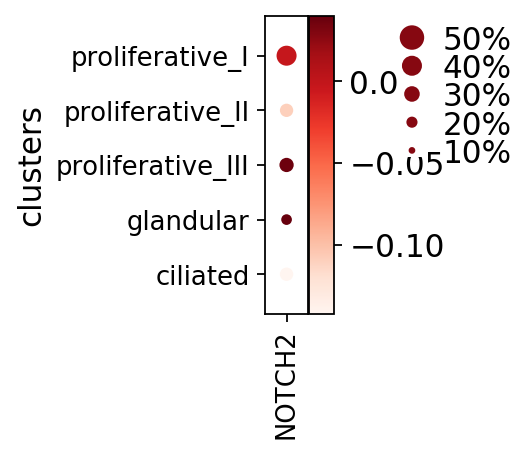

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.35, 0, 0.2, 0.5, 0.25])

In [14]:
markers = ['MMP7', 'ESR1', 'PAEP', 'SCGB2A1', 'PIFO', 'TPPP3']
sc.pl.dotplot(adata_count, markers, groupby='clusters', dendrogram=False, save='_figure2c_primary_epithelial.pdf')
sc.pl.dotplot(adata_count, ['NOTCH2'], groupby='clusters', dendrogram=False, save='_NOTCH2_primary_epithelial.pdf')

## with high-resolution

#### Load cell clusters annotation from highresolution

In [108]:
meta = pd.read_csv('figures_primaryEpithelial_noCiliated/barcode_metadata.csv')
meta = meta.set_index('index')
meta.clusters = meta.clusters.str.replace('\/', '-')
meta.clusters = meta.clusters.str.replace(' ', '_')

,batch,bh_pval,bonf_pval,clinical,day,individual,is_doublet,is_doublet_propagate,leiden,location,...,scrublet_score,treatment,type,zscore,leiden_K,cycle_phase,S_score,G2M_score,leiden_v0,clusters
index,,,,,,,,,,,,,,,,,,,,,
4861STDY7309368_AACTTTCCAGACGTAG,0,0.809091,1.0,U,U,A10,False,False,3,ENMY,...,0.043307,C,CBTM,-0.150670,5,P,-0.540678,-0.252827,1,LYPD1
4861STDY7309368_AACTTTCCAGTGACAG,0,0.809091,1.0,U,U,A10,False,False,7,ENMY,...,0.121951,C,CBTM,0.726267,5,P,-0.579753,-0.338002,2,doublet
4861STDY7309368_AATCCAGTCAGAAATG,0,0.809091,1.0,U,U,A10,False,False,3,ENMY,...,0.063830,C,CBTM,-0.076639,5,P,-0.751060,-0.455365,2,LYPD1
4861STDY7309368_AATCGGTTCATGTAGC,0,0.809091,1.0,U,U,A10,False,False,3,ENMY,...,0.040000,C,CBTM,-0.150670,5,P,0.055775,-0.062420,1,LYPD1
4861STDY7309368_ACACCAACAGGCTGAA,0,0.809091,1.0,U,U,A10,False,False,3,ENMY,...,0.038425,C,CBTM,-0.076639,5,P,0.091702,-0.307625,2,LYPD1


#### Transfer cluster annotation labels

... storing 'clusters2' as categorical


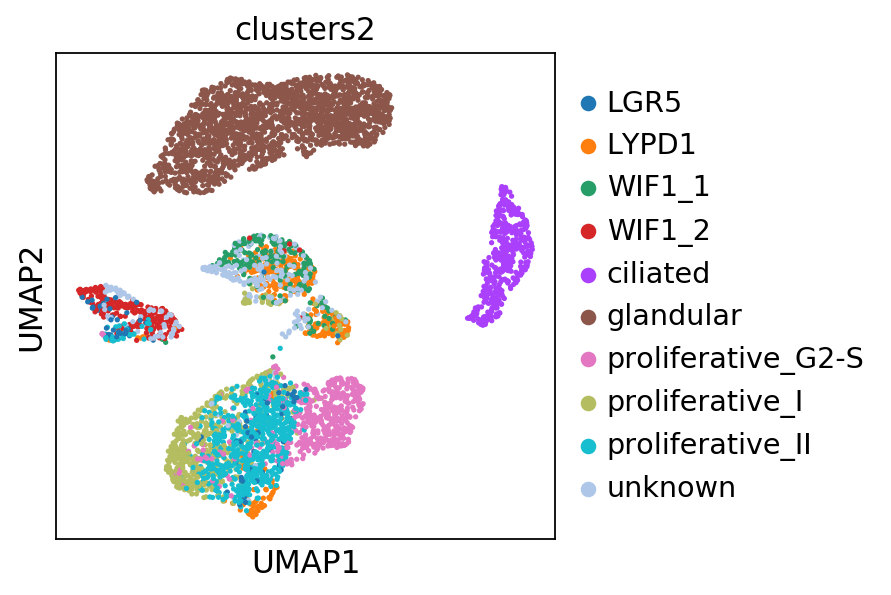

In [135]:
adata.obs['clusters2'] = adata.obs.clusters.tolist()
for cl in set(meta.clusters.tolist()):
    idx = np.asarray([i in meta[meta['clusters'] == cl].index.tolist() for i in adata.obs_names ])
    adata.obs.at[ idx , 'clusters2'] = cl

adata.obs.at[adata.obs['clusters2'] == 'KRT5', 'clusters2'] = 'unknown'
adata.obs.at[adata.obs['clusters2'] == 'LHX1', 'clusters2'] = 'unknown'
adata.obs.at[adata.obs['clusters2'] == 'doublet', 'clusters2'] = 'unknown'
sc.pl.umap(adata, color=['clusters2'])

adata.obs['clusters2'].cat.reorder_categories(['proliferative_I', 'proliferative_II', 'proliferative_G2-S',
                                              'LGR5', 'glandular', 'ciliated',
                                               'WIF1_1', 'WIF1_2', 'LYPD1', 'unknown'], inplace=True)
sc.pl.umap(adata, color=['clusters2'])

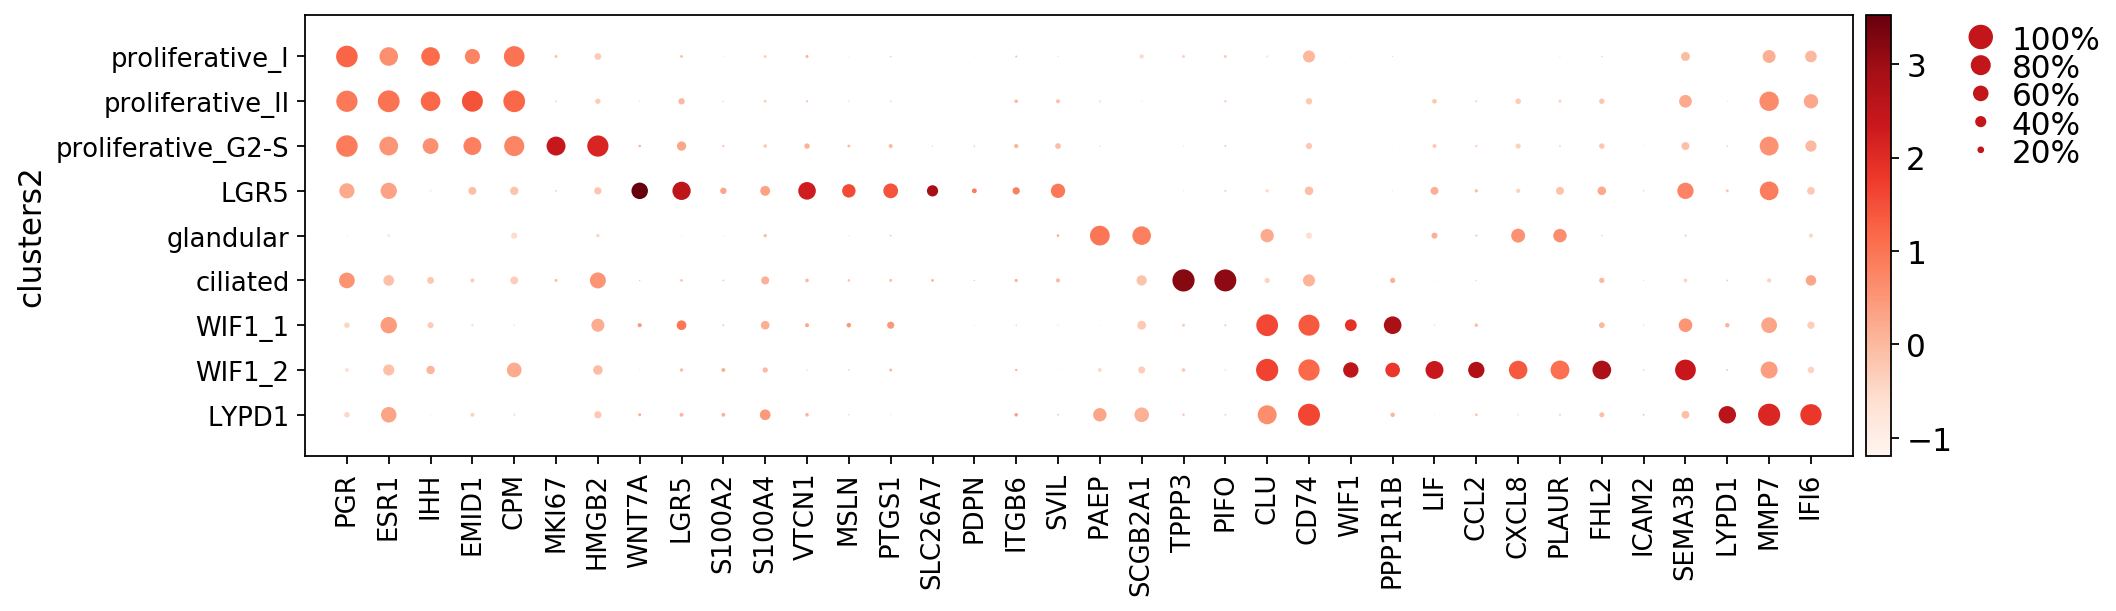

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[12.6, 0, 0.2, 0.5, 0.25])

In [140]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count, max_value=10)

markers = ["PGR", "ESR1", "IHH", "EMID1", "CPM", "MKI67", "HMGB2", "WNT7A", "LGR5", "S100A2", "S100A4", "VTCN1", "MSLN", "PTGS1", "SLC26A7", "PDPN", "ITGB6", "SVIL", "PAEP", "SCGB2A1", "TPPP3", "PIFO", "CLU", "CD74", "WIF1", "PPP1R1B", "LIF", "CCL2", "CXCL8", "PLAUR", "FHL2", "ICAM2", "SEMA3B", "LYPD1", "MMP7", "IFI6"]
sc.pl.dotplot(adata_count[[ i not in 'unknown' for i in adata.obs['clusters2']]], markers, groupby='clusters2', dendrogram=False, save='_figure1L_mergedEpithelial.pdf')

## Markers on UMAP

In [23]:
# markers = ['PGR', 'IHH', 'IGFBP4', 'GCLC', 'EMID1', 'CPM',
#                              'MKI67','HMGB2', "NOTCH3",
#                                   'LGR5','WNT7A', 'VTCN1', 'SLC26A7', 'CLDN22', 'PDPN', 'KRT5',
#                                  'LGR6', 'PNMT', 'TRH', 'PPP1R1B', 'ALDH1A1', 'WIF1',
#                                  'SEMA3B','FHL2', 'LIF', 'CCL2', 'ICAM1', 'CXCL2',
#                                  'MMP7', 'IFI6', 'RBP1', 'LYPD1', 'PAEP',
#                              'PTGS1', 'MT1G','ENPP3', 'SLC26A2',
#                                'C10orf10','NOTCH2', 'SCGB2A1', 'PDK4', 'ANG', 'C4BPA',
#                             'CXCL14','PAEP', 'RIMKLB', 'NUPR1','TFF3', 'MUC5B', 
#                             'LTF', 'BPIFB1', 'LHX1', 'PIFO', 'FOXJ1', 'TPPP3']
# sc.pl.umap(adata, color=markers, save='-markers_primary_epithelial_fromDotplot.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [24]:
# sc.pl.umap(adata, color=["EPCAM"], color_map='OrRd', use_raw=True) # FEMALE
# sc.pl.umap(adata, color=["NOTCH2"], color_map='OrRd', use_raw=True) # FEMALE
# sc.pl.umap(adata, color=["ACE2"], color_map='OrRd', use_raw=True)

In [25]:
# sc.pl.umap(adata, color=["LGR4", "LGR5", "LGR6", "NGFR", "TP63", "KRT5", "PDPN", "SOX9", "WNT7A", "SOX2", "SNAI2", "ZEB1"], save='-markers_primary_epithelial_RoserStemPopulations.pdf',color_map='OrRd', use_raw=True) # FEMALE
# sc.pl.umap(adata, color=["FGFR2", "CTNNB1", "FBXW7" , "MYC", "CCNE1", "ARID1A", "ERBB2", "PIK3CA", "ERBB2", "PTEN", "SPOP", "FOXA2", "ARHGAP35", "TP53", "ZFHX3"], save='-markers_figure6_primary_epithelial_RoserTranslational.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [26]:
# sc.pl.umap(adata, color=["PGR", "TRH", # Proliferative 
#                          "MMP10",# Menstruation 
#                          "GLI3", "IHH", "SHH",  # sonic hedgehog (Shh) pathway
#                          "PAEP", # Glandular secretory
#                          "IGFBP2", "LHX1", "GPRC5A"], save='-markers_keystages.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [27]:
# sc.pl.umap(adata, color=["WNT7A", 
#                          "MKI67", # progenitor 
#                          "LYPD1", # Unknown 1
#                          "WIF1",  "CCL2", # Unknown 2
#                          "CXCL14", #  Only Glandular
#                          "SLC26A2", #  Mid Secretory Glandular
#                          "DPP4", #  Late Secretory Glandular
#                          "TFF3",
#                          "MUC5B" # new lubricant
#                         ], save='-markers_LuzPanel.pdf',color_map='OrRd', use_raw=False) # FEMALE

In [28]:
# sc.pl.umap(adata, color=["KRT5",  "LGR6", "WNT7A", "MKI67", 
#                          "PGR", "TRH", "NUPR1", "RIMKLB", "EMID1", "IHH", "IFI27", "ESR1", "LGR5",# progenitor 
#                          "WIF1", "KRT13", "MMP7", "CCL2", "PLAU", # Luminal 
#                          "PAEP",  "DPP4", # Early Glandular
#                          "SCGB1D2",# Late Glandular
#                          "MUC5B"], save='-markers_pseudotime.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [29]:
# sc.pl.umap(adata, color=["MMP7", "PAEP", "KRT13", "KRT18", # Roser panel
#                          "WNT7A", "NOTCH2",# Roser panel
#                          "PLAU", "CXCL8", "LIF",# Roser panel
#                          "LGR6", "WIF1", "DKK3", # progenitor 
#                          "LYPD1", "PGR", "IHH", "LCN2",
# #                          "PIFO", "FOXJ1",  #ciliated
#                          "SEMA3B", "SEMA3C", "SVIL", "FHL2", "CCL2", #luminal secretory
#                          "DCDC2", "HES6",  # from organoids analysis - early secretory
#                          "PLAU", # from Simon -  menstrual/ early proliferative
#                          "CXCL8", "SCGB2A1", # from Simon - mid secretory
#                          "PAEP", # from organoids analysis - late secretory
#                          "HMGB2", # proliferating
#                          "MUC5B", 'TFF3', # secretory mucosa
#                          "LIF", "MUC1", "VTCN1", "LGR5", "HPGD", "SULT1E1", "IL6", # unknown
#                          "CALCA", "PLAT", 
#                          "LCN2", "SLC22A17"
#                         ], save='-markers.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [30]:
# sc.pl.umap(adata, color=["PLAU", "MMP7", "THBS1", "CADM1",
#                          "NPAS3", "ATP1A1", "ANK3", "ALPL", 
#                          "TRAK1", "SCGB1D2", "MT1F", "MT1X",
#                          "MT1E", "MT1G", "CXCL14", "MAOA",
#                          "DPP4", "NUPR1", "GPX3", "PAEP"], save='-markers_SimonTimeline.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [31]:
# sc.pl.umap(adata, color=["PGR", "TRH", # Proliferative 
#                          "MMP10",# Menstruation 
#                          "GLI3", "IHH", "SHH",  # sonic hedgehog (Shh) pathway
#                          "PAEP" # Glandular secretory
#                          ], save='-markers_keystages.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [32]:
# sc.pl.umap(adata, color=["SLC26A2", "DPP4", "PLAU", "SEMA3B",
#                          "LHX1", "LGR6", "KRT13", "WNT7A",
#                           "WIF1", "KRT5","LYPD1", "PAEP", "CCL2", "PTGS1"], save='-markers_RoserPanel.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [33]:
# sc.pl.umap(adata, color=["HMGB2", "MKI67", "DKK1", "LIF",
#                          "CXCL8", "PLAU", "WNT7A", "NOTCH3",
#                           "NOTCH2", "MMP7","KRT13", "PAEP",
#                         "NGFR", "TP63", "KRT5", "PDPN"], save='-markers_RoserPanel.pdf',color_map='OrRd', use_raw=True) # FEMALE

## Finding marker genes


### All vs rest

TF-IDF

In [75]:
adata_bin = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)

import episcanpy as epi
epi.pp.binarize(adata_bin, copy=False)
adata_bin.X.shape


(5284, 20991)

In [78]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer

tfidf = transformer.fit_transform(adata_bin.X.T)
adata_bin.X = tfidf.T
adata_bin.X.shape

(5284, 20991)

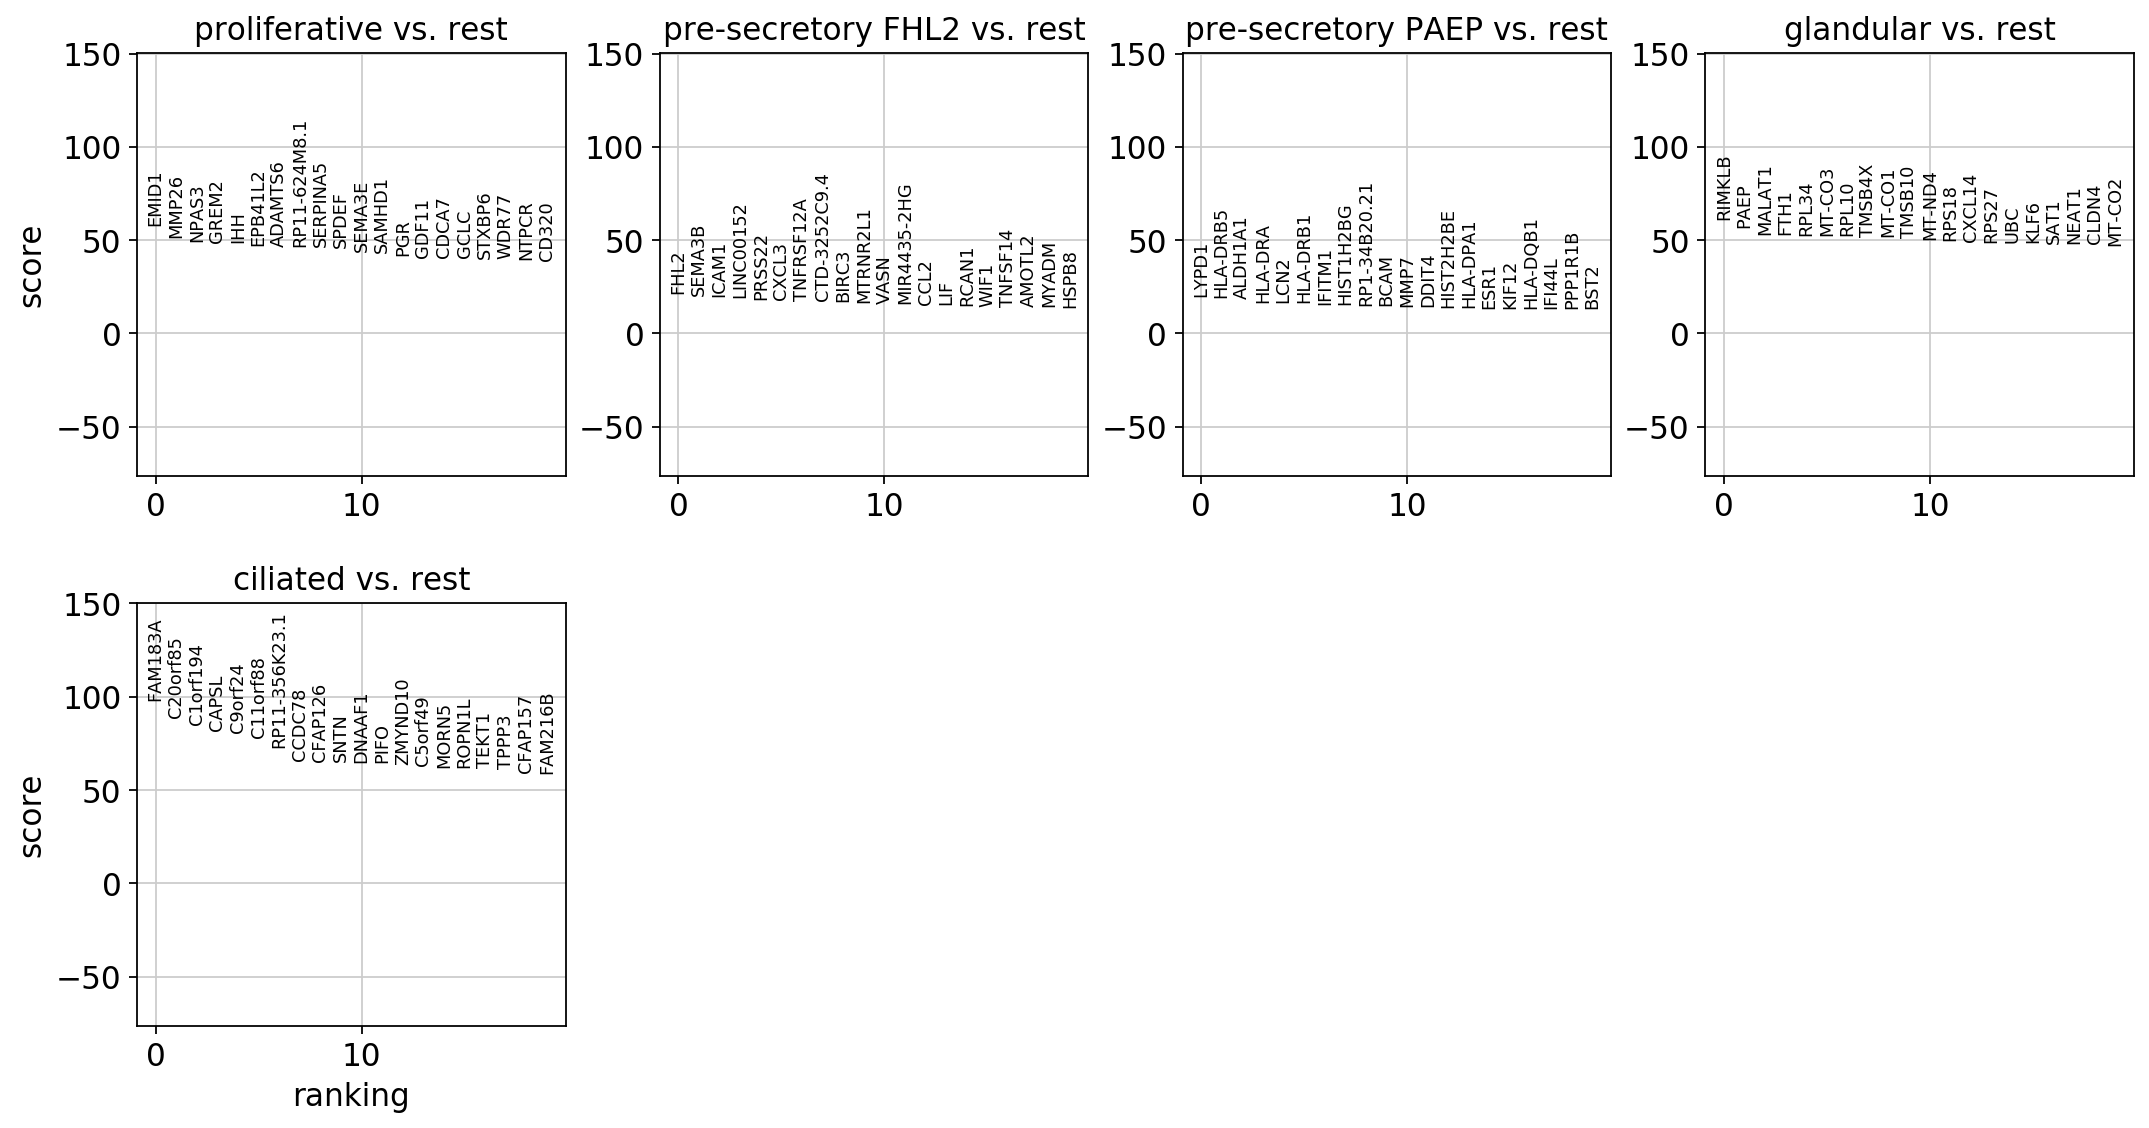

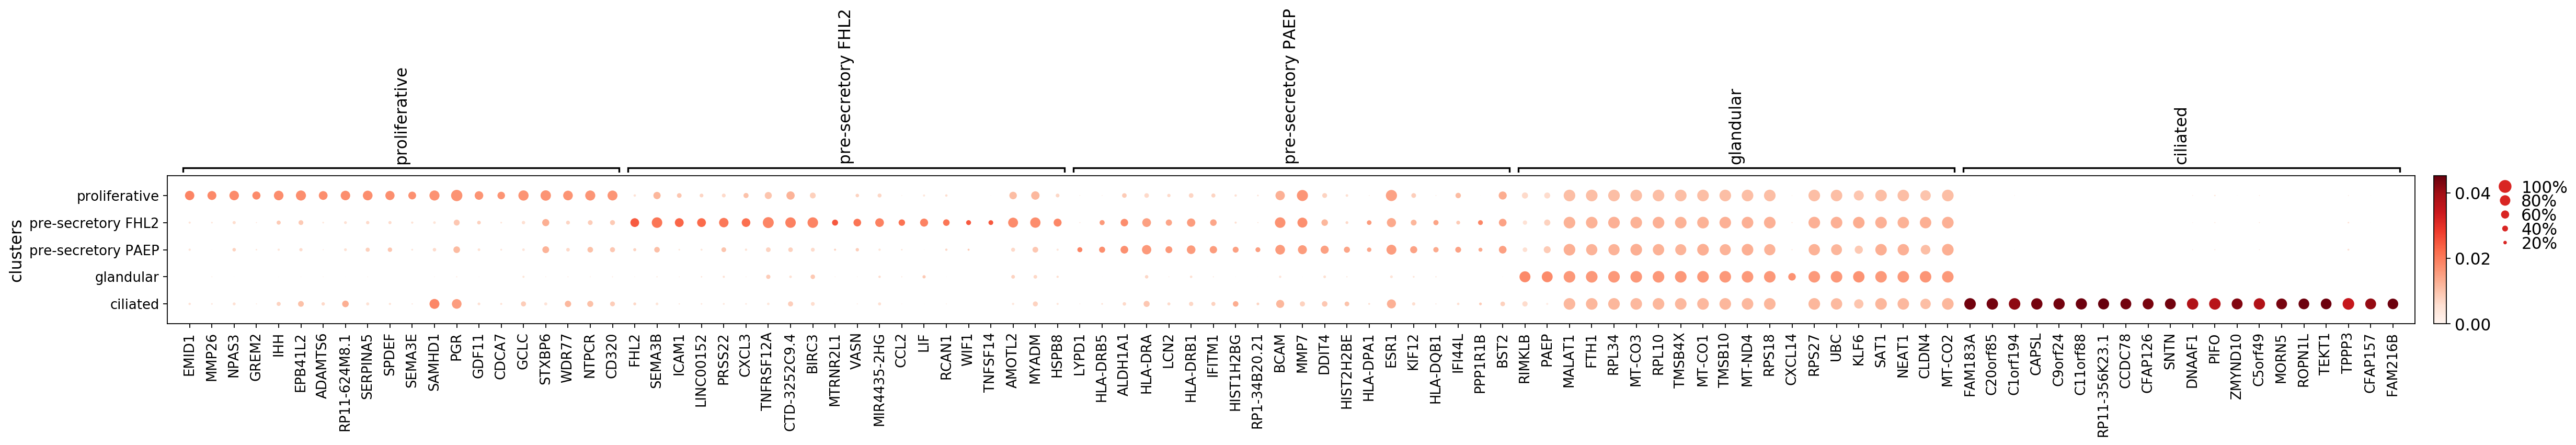

In [63]:
sc.tl.rank_genes_groups(adata_bin, groupby='clusters', n_genes=50000, use_raw=False) #, method='logreg'
sc.pl.rank_genes_groups(adata_bin, n_genes=20, save='_tfidf.pdf')
sc.pl.rank_genes_groups_dotplot(adata_bin, n_genes=20, dendrogram=False, save='_tfidf_DEscanpy.pdf')

In [64]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count, max_value=10)
adata_count.uns['rank_genes_groups'] = adata_bin.uns['rank_genes_groups']

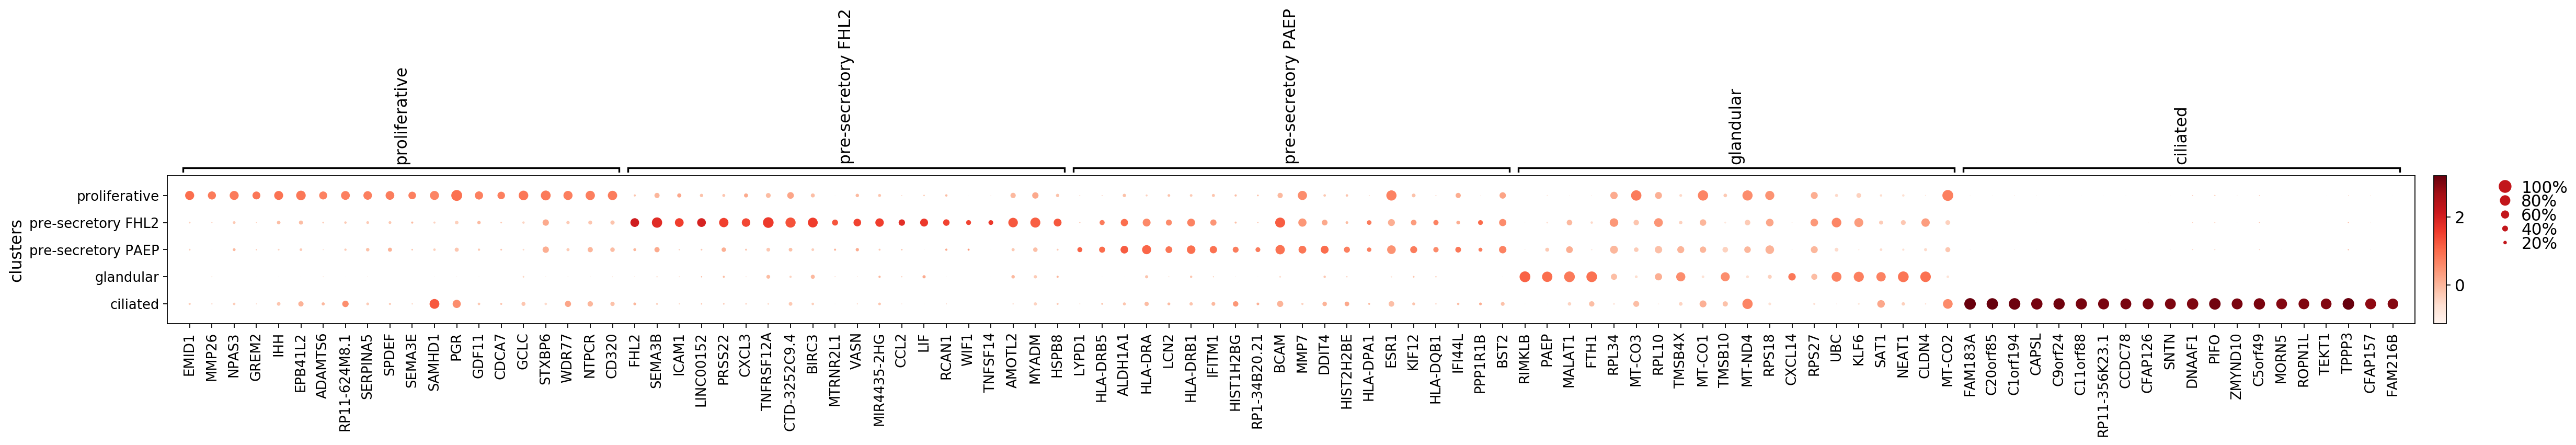

In [65]:
sc.pl.rank_genes_groups_dotplot(adata_count, n_genes=20, dendrogram=False, save='_tfidf_DEscanpy.pdf')

#### scanpy

In [55]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count, max_value=10)
# marker calling

In [56]:
sc.tl.rank_genes_groups(adata_count, groupby='clusters', n_genes=50000, use_raw=False) #, method='logreg'

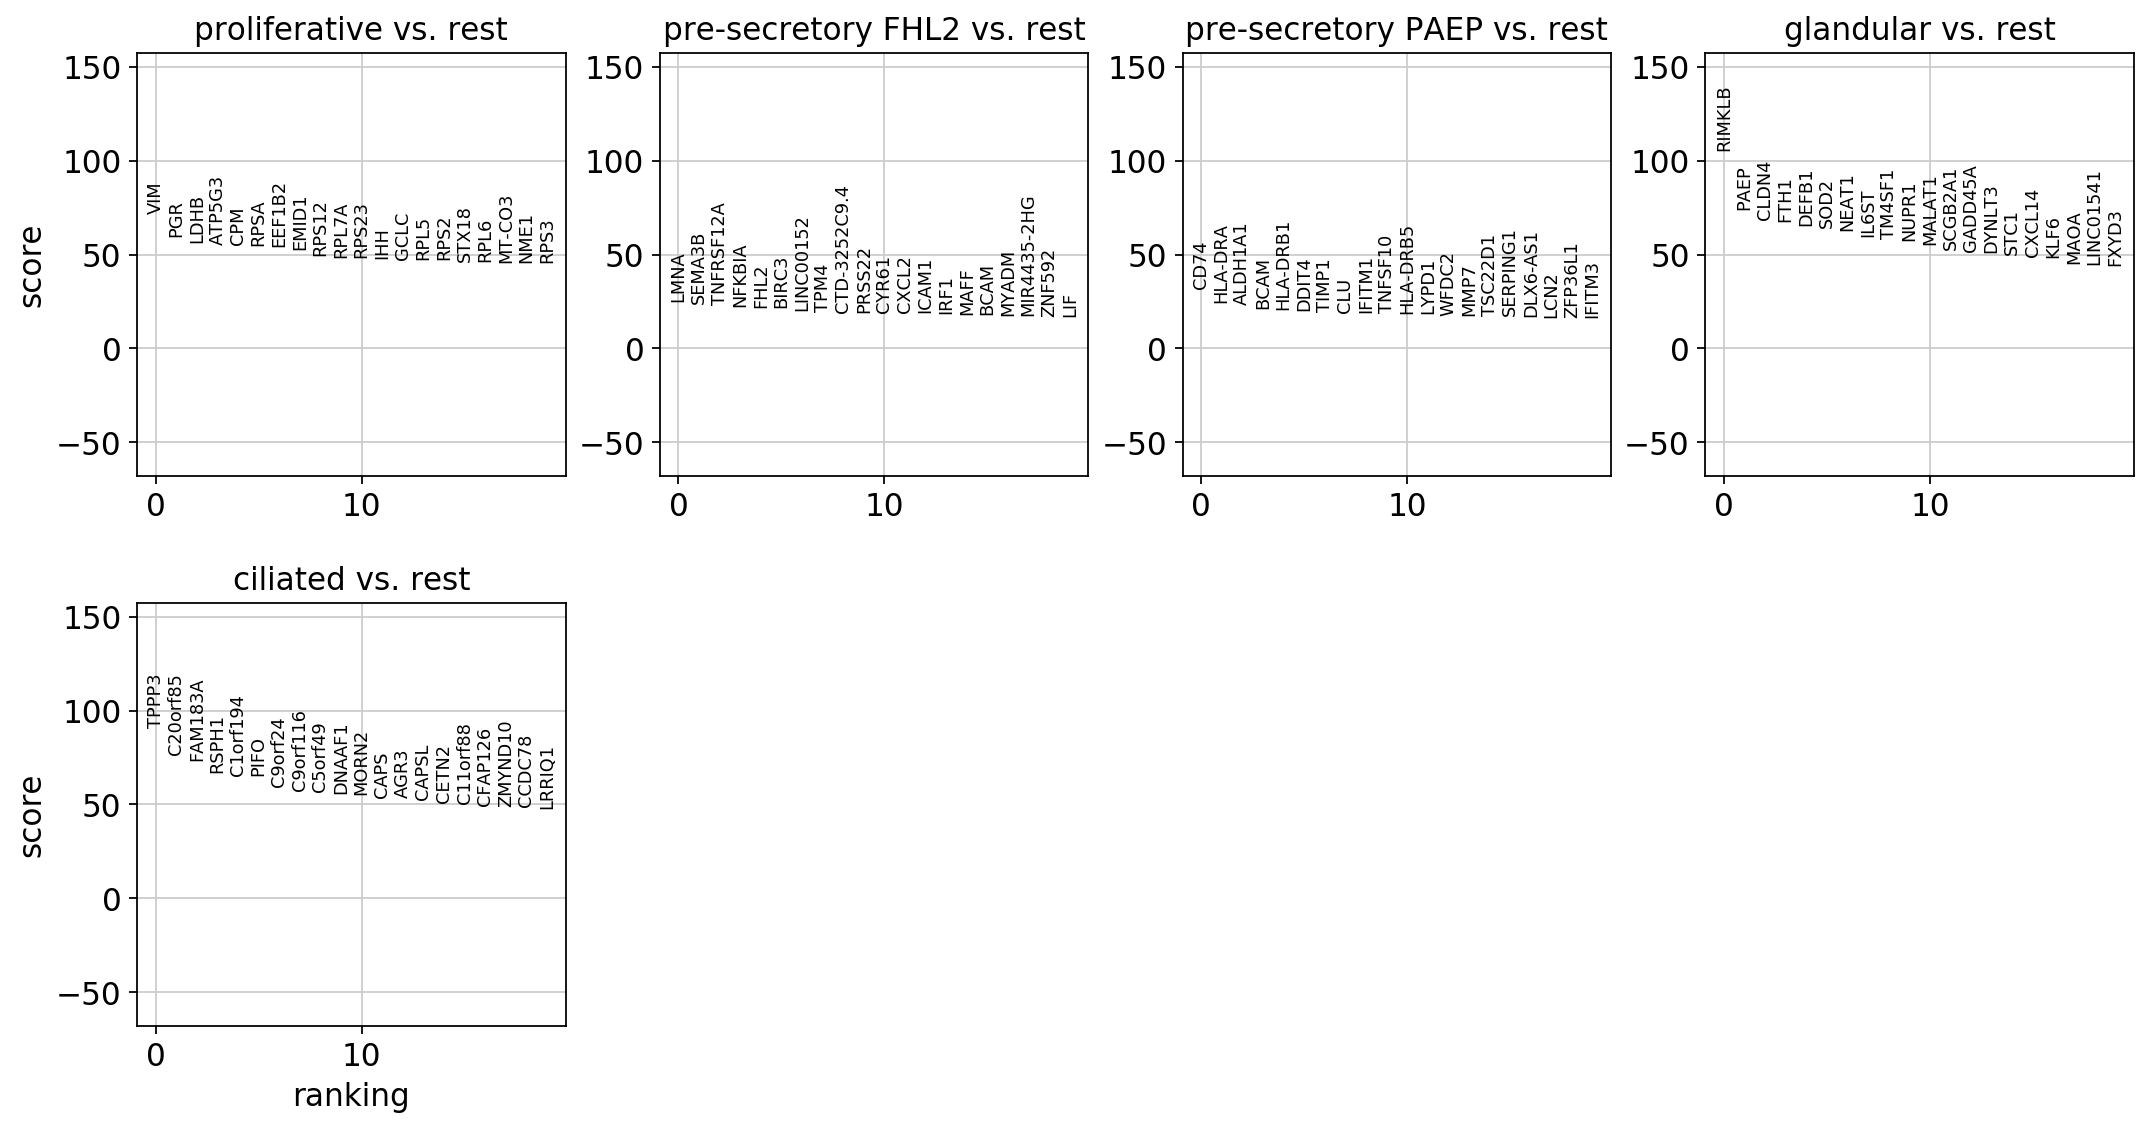

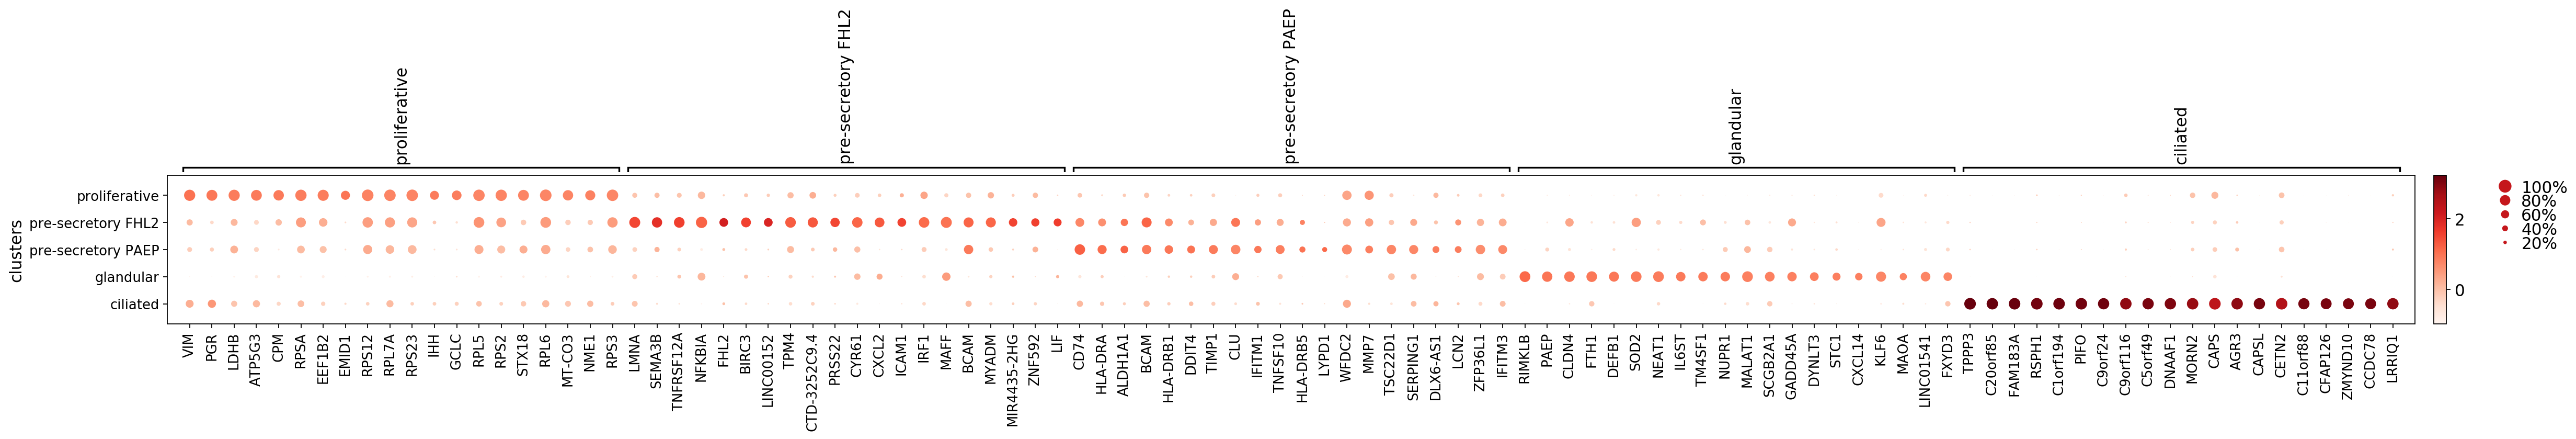

In [57]:
#marker visualisation
sc.pl.rank_genes_groups(adata_count, n_genes=20, save='.pdf')
sc.pl.rank_genes_groups_dotplot(adata_count, n_genes=5, dendrogram=False, save='_DEscanpy.pdf')

In [49]:
result = adata_count.uns['rank_genes_groups']

adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)

os.system('mkdir -p '+str(sc.settings.figdir)+'/cluster_markers/')
os.system('rm '+str(sc.settings.figdir)+'/cluster_markers/*scanpy*.csv')

for group in result['names'].dtype.names:
    print(group)
    adata_clus = adata_count[adata_count.obs['clusters'] == group]
    adata_rest = adata_count[[not i for i in adata_count.obs['clusters']==group]]
    mask = (result['pvals_adj'][group]<=1) & (result['scores'][group]>0)
    markdict = {'gene_'+key: result[key][group][mask] for key in ['names', 'pvals', 'pvals_adj', 'logfoldchanges']}
    adata_clus = adata_clus[:,markdict['gene_names']]
    adata_rest = adata_rest[:,markdict['gene_names']]
    markdict['mean_cluster'] = np.asarray(np.mean(adata_clus.X,axis=0)).reshape(-1)
    markdict['mean_rest'] = np.asarray(np.mean(adata_rest.X,axis=0)).reshape(-1)
    markdict['log2_FC'] = np.asarray(np.log2(markdict['mean_cluster']/markdict['mean_rest'])).reshape(-1)
    #are you expressed?
    adata_clus.X = adata_clus.X > 0
    adata_rest.X = adata_rest.X > 0
    markdict['percent_cluster'] = np.asarray(100*np.sum(adata_clus.X,axis=0)/adata_clus.shape[0]).reshape(-1)
    markdict['percent_rest'] = np.asarray(100*np.sum(adata_rest.X,axis=0)/adata_rest.shape[0]).reshape(-1)
    df = pd.DataFrame(markdict)
    df.rename(columns={'gene_names':'Gene',
                       'gene_logfoldchanges':'logFC',
                       'log2_FC':'log2_FC',
                       'gene_pvals':'P.Value',
                       'gene_pvals_adj':'adj.P.Val',
                       'mean_cluster':'mean_cluster',
                       'mean_rest':'mean_rest'},
              inplace=True)
    df.to_csv(str(sc.settings.figdir)+'/cluster_markers/'+group+'_scanpy_DEGs.csv')

proliferative


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


pre-secretory FHL2


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


pre-secretory PAEP


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


glandular


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


ciliated


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


#### DE with limma

Prepare object to run limma

In [ ]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs)
sc.pp.filter_genes(adata_count, min_cells=5)
sc.pp.filter_cells(adata_count, min_genes=200)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
print(adata_count.X.shape)

In [ ]:
t = adata_count.X.toarray().T
df = pd.DataFrame(data=t, columns= adata_count.obs.index, index=adata_count.var_names)

In [ ]:
adata_count.obs['clusters'].values.describe()

In [ ]:
meta_df = pd.DataFrame(data={'Cell':list(adata_count.obs.index),
                             'cell_type':[ str(i) for i in adata_count.obs['clusters']],
                             'sample':[ str(i) for i in adata_count.obs['individual']],
                             'covariate':[ i for i in adata_count.obs['type']]})
meta_df.head()

In [ ]:
outpath = str(sc.settings.figdir)+'/cluster_markers/'

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R -i df -i meta_df -i outpath

library(limma)
library(edgeR)

# Format
ex_mat=as.matrix(df)
rownames(meta_df) = meta_df$Cell


# Shared cells
rownames(meta_df) = gsub('-', '.', rownames(meta_df))
colnames(ex_mat) = gsub('^X', '', colnames(ex_mat))

shared_cells = intersect(rownames(meta_df), colnames(ex_mat))
print(rownames(meta_df)[1:3])
print(colnames(ex_mat)[1:3])
message(length(shared_cells), ' shared cells')
ex_mat = ex_mat[, shared_cells]
meta_df = meta_df[shared_cells,]

# Filter low expressed genes
keep = aveLogCPM(ex_mat) > 0
ex_mat = ex_mat[ keep, ]

# Extract celltypes
cells = rownames(meta_df)
covariate = meta_df$covariate


# For each cluster, make cluster vs rest comparison
celltypes = unique(meta_df$cell_type)
for (celltype in celltypes){
    message(celltype)
    
    # Extract cells in cluster and rest
    cells_cluster = rownames(subset(meta_df, cell_type == celltype))
    cells_rest = rownames(subset(meta_df, cell_type != celltype))
    message('Cells in cluster ', length(cells_cluster), '\nCells in rest ', length(cells_rest))
    
    # build cluster_type vector
    cluster_type = rep(0, length(cells))
    names(cluster_type) = cells
    cluster_type[ cells_cluster ] = 'cluster'
    cluster_type[ cells_rest ] = 'rest'
    
    design.matrix <- model.matrix(~ 0 + cluster_type + covariate)
    
    # Now tell limma how do you want to compare (i.e. cluster vs rest rest)
    contrast.matrix <- makeContrasts(clVSrest = cluster_typecluster - cluster_typerest, levels = design.matrix)

    # Make model and run contrasts
    fit <- lmFit(ex_mat, design.matrix)
    fit <- contrasts.fit(fit, contrast.matrix)
    fit <- eBayes(fit)
    
    # Make a dataframe containing the important data
    results = topTable(fit, adjust="fdr", number = nrow(ex_mat), coef = 'clVSrest')
    
    # Add and filter needed data
    results$Gene = rownames(results)
    results = results[ , c('Gene', 'logFC', 'P.Value', 'adj.P.Val')]
    results$AveExpr_cluster = apply(ex_mat[ results$Gene, cells_cluster], 1, mean)
    results$AveExpr_rest = apply(ex_mat[ results$Gene, cells_rest], 1, mean)
    results$percentExpr_cluster = apply(ex_mat[ results$Gene, cells_cluster], 1, function(x) sum(c(x > 0)+0) ) / length(cells_cluster)
    results$percentExpr_rest = apply(ex_mat[ results$Gene, cells_rest], 1, function(x) sum(c(x > 0)+0) ) / length(cells_rest)
    
    results$AveExpr_cluster = round(results$AveExpr_cluster, 6)
    results$AveExpr_rest = round(results$AveExpr_rest, 6)
    results$percentExpr_cluster = round(results$percentExpr_cluster, 6)
    results$percentExpr_rest = round(results$percentExpr_rest, 6)
    # and store it as csv file
    write.csv(results, file = paste0(outpath, celltype, '_DEGs.csv'), row.names = F, col.names = T, quote = F)
    
}

In [ ]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count, max_value=10)

import rbcde
rbcde.RBC(adata_count, use_raw=False, clus_key='clusters')
degs, plot_dict = rbcde.filter_markers(adata_count, use_raw=False, thresh=0.5)

In [ ]:
set(degs.cluster.values)

In [ ]:
for clus in set(degs.cluster.values):
    sc.pl.dotplot(adata_count, {clus: plot_dict[clus][:50]}, groupby='clusters', save='_rbcde_'+clus+'.pdf')


In [ ]:
# with open('data/markers/luminal.csv','r') as fid:
#     markers = np.unique([line.rstrip() for line in fid.readlines()])

# #make sure they're in the dataset, and sort them alphabetically for ease of finding things
# markers = sorted([item for item in markers if item in adata.var_names])

# for i in np.arange(np.ceil(len(markers)/4)):
#     sc.pl.umap(adata, color=markers[int(i*4):int((i+1)*4)], use_raw=False, save='-markers'+str(int(i+1))+'.pdf', color_map='OrRd')

# #goodbye clutter!
# MovePlots('markers','markers')

In [ ]:
# with open('data/markers/glandular.csv','r') as fid:
#     markers = np.unique([line.rstrip() for line in fid.readlines()])

# #make sure they're in the dataset, and sort them alphabetically for ease of finding things
# markers = sorted([item for item in markers if item in adata.var_names])

# for i in np.arange(np.ceil(len(markers)/4)):
#     sc.pl.umap(adata, color=markers[int(i*4):int((i+1)*4)], use_raw=False, save='-markers'+str(int(i+1))+'.pdf', color_map='OrRd')

# #goodbye clutter!
# MovePlots('markers','markers')

In [ ]:
# with open('data/markers/Markers_epithelium_genesonly.csv','r') as fid:
#     markers = np.unique([line.rstrip() for line in fid.readlines()])

# #make sure they're in the dataset, and sort them alphabetically for ease of finding things
# markers = sorted([item for item in markers if item in adata.var_names])

# sc.pl.umap(adata, color=markers, use_raw=False, save='-markers_fromSimon.pdf', color_map='OrRd')

In [ ]:
# with open('figures_both_organoid/cluster_markers/top10genes_per_cluster.txt','r') as fid:
#     markers = [line.rstrip() for line in fid.readlines()]

# #make sure they're in the dataset, and sort them alphabetically for ease of finding things
# markers = [item for item in markers if item in adata_count.var_names]

# sc.pl.dotplot(adata_count, markers, groupby='clusters', dendrogram=False, save='_organoidMarkers_in_primaryEpithelial.pdf')

## Glandular versus ciliated

In [ ]:
adata = adata[[ i in ['glandular', 'ciliated']  for i in adata.obs['clusters'] ]] 

#### scanpy

In [ ]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count, max_value=10)
# marker calling

In [ ]:
sc.tl.rank_genes_groups(adata_count, groupby='clusters', n_genes=50000, use_raw=False) #, method='logreg'

In [ ]:
#marker visualisation
sc.pl.rank_genes_groups(adata_count, n_genes=20, save='_glandVsciliated.pdf')
sc.pl.rank_genes_groups_dotplot(adata_count, n_genes=20, dendrogram=False, save='_glandVsciliated_DEscanpy.pdf')

In [ ]:
result = adata_count.uns['rank_genes_groups']

adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)

os.system('mkdir -p '+str(sc.settings.figdir)+'/cluster_markers/')

for group in result['names'].dtype.names:
    print(group)
    adata_clus = adata_count[adata_count.obs['clusters'] == group]
    adata_rest = adata_count[[not i for i in adata_count.obs['clusters']==group]]
    mask = (result['pvals_adj'][group]<=1) & (result['scores'][group]>0)
    markdict = {'gene_'+key: result[key][group][mask] for key in ['names', 'pvals', 'pvals_adj', 'logfoldchanges']}
    adata_clus = adata_clus[:,markdict['gene_names']]
    adata_rest = adata_rest[:,markdict['gene_names']]
    markdict['mean_cluster'] = np.asarray(np.mean(adata_clus.X,axis=0)).reshape(-1)
    markdict['mean_rest'] = np.asarray(np.mean(adata_rest.X,axis=0)).reshape(-1)
    markdict['log2_FC'] = np.asarray(np.log2(markdict['mean_cluster']/markdict['mean_rest'])).reshape(-1)
    #are you expressed?
    adata_clus.X = adata_clus.X > 0
    adata_rest.X = adata_rest.X > 0
    markdict['percent_cluster'] = np.asarray(100*np.sum(adata_clus.X,axis=0)/adata_clus.shape[0]).reshape(-1)
    markdict['percent_rest'] = np.asarray(100*np.sum(adata_rest.X,axis=0)/adata_rest.shape[0]).reshape(-1)
    df = pd.DataFrame(markdict)
    df.rename(columns={'gene_names':'Gene',
                       'gene_logfoldchanges':'logFC',
                       'log2_FC':'log2_FC',
                       'gene_pvals':'P.Value',
                       'gene_pvals_adj':'adj.P.Val',
                       'mean_cluster':'mean_cluster',
                       'mean_rest':'mean_rest'},
              inplace=True)
    df.to_csv(str(sc.settings.figdir)+'/cluster_markers/'+group+'_glandVsciliated_scanpy_DEGs.csv')

#### DE with limma

Prepare object to run limma

In [ ]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs)
sc.pp.filter_genes(adata_count, min_cells=5)
sc.pp.filter_cells(adata_count, min_genes=100)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
print(adata_count.X.shape)

In [ ]:
t = adata_count.X.toarray().T
df = pd.DataFrame(data=t, columns= adata_count.obs.index, index=adata_count.var_names)

In [ ]:
adata_count.obs['clusters'].values.describe()

In [ ]:
meta_df = pd.DataFrame(data={'Cell':list(adata_count.obs.index),
                             'cell_type':[ str(i) for i in adata_count.obs['clusters']],
                             'sample':[ str(i) for i in adata_count.obs['individual']],
                             'covariate':[ i for i in adata_count.obs['type']]})
meta_df.head()

In [ ]:
outpath = str(sc.settings.figdir)+'/cluster_markers/'

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R -i df -i meta_df -i outpath

library(limma)
library(edgeR)

# Format
ex_mat=as.matrix(df)
rownames(meta_df) = meta_df$Cell


# Shared cells
rownames(meta_df) = gsub('-', '.', rownames(meta_df))
colnames(ex_mat) = gsub('^X', '', colnames(ex_mat))

shared_cells = intersect(rownames(meta_df), colnames(ex_mat))
print(rownames(meta_df)[1:3])
print(colnames(ex_mat)[1:3])
message(length(shared_cells), ' shared cells')
ex_mat = ex_mat[, shared_cells]
meta_df = meta_df[shared_cells,]

# Filter low expressed genes
keep = aveLogCPM(ex_mat) > 0
ex_mat = ex_mat[ keep, ]

# Extract celltypes
cells = rownames(meta_df)
covariate = meta_df$covariate


# For each cluster, make cluster vs rest comparison
celltypes = unique(meta_df$cell_type)
for (celltype in celltypes){
    message(celltype)
    
    # Extract cells in cluster and rest
    cells_cluster = rownames(subset(meta_df, cell_type == celltype))
    cells_rest = rownames(subset(meta_df, cell_type != celltype))
    message('Cells in cluster ', length(cells_cluster), '\nCells in rest ', length(cells_rest))
    
    # build cluster_type vector
    cluster_type = rep(0, length(cells))
    names(cluster_type) = cells
    cluster_type[ cells_cluster ] = 'cluster'
    cluster_type[ cells_rest ] = 'rest'
    
    design.matrix <- model.matrix(~ 0 + cluster_type + covariate)
    
    # Now tell limma how do you want to compare (i.e. cluster vs rest rest)
    contrast.matrix <- makeContrasts(clVSrest = cluster_typecluster - cluster_typerest, levels = design.matrix)

    # Make model and run contrasts
    fit <- lmFit(ex_mat, design.matrix)
    fit <- contrasts.fit(fit, contrast.matrix)
    fit <- eBayes(fit)
    
    # Make a dataframe containing the important data
    results = topTable(fit, adjust="fdr", number = nrow(ex_mat), coef = 'clVSrest')
    
    # Add and filter needed data
    results$Gene = rownames(results)
    results = results[ , c('Gene', 'logFC', 'P.Value', 'adj.P.Val')]
    results$AveExpr_cluster = apply(ex_mat[ results$Gene, cells_cluster], 1, mean)
    results$AveExpr_rest = apply(ex_mat[ results$Gene, cells_rest], 1, mean)
    results$percentExpr_cluster = apply(ex_mat[ results$Gene, cells_cluster], 1, function(x) sum(c(x > 0)+0) ) / length(cells_cluster)
    results$percentExpr_rest = apply(ex_mat[ results$Gene, cells_rest], 1, function(x) sum(c(x > 0)+0) ) / length(cells_rest)
    
    results$AveExpr_cluster = round(results$AveExpr_cluster, 6)
    results$AveExpr_rest = round(results$AveExpr_rest, 6)
    results$percentExpr_cluster = round(results$percentExpr_cluster, 6)
    results$percentExpr_rest = round(results$percentExpr_rest, 6)
    # and store it as csv file
    write.csv(results, file = paste0(outpath, celltype, '_glandVsciliated_DEGs.csv'), row.names = F, col.names = T, quote = F)
    
}